In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import the dataset.

In [32]:
df = pd.read_csv('PlayTennis.csv')
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Initiate the implementation by performing data pre-processing steps.. Detail the 
steps involved in cleaning, handling missing values, and encoding categorical 
variables.  

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [34]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [35]:
from sklearn.preprocessing import LabelEncoder


In [36]:
label_encoder = LabelEncoder()

In [37]:
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])
df['Wind'] = label_encoder.fit_transform(df['Wind'])
df['Play Tennis'] = label_encoder.fit_transform(df['Play Tennis'])


In [38]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [42]:
x=df.drop('Play Tennis',axis=1)

In [44]:
y=df['Play Tennis']


Implement code to predict the test results using the trained Decision Tree model. 

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [49]:
X_train


,Outlook,Temperature,Humidity,Wind
12,0,1,1,1
5,1,0,1,0
8,2,0,1,1
2,0,1,0,1
1,2,1,0,0
13,1,2,0,0
4,1,0,1,1
7,2,2,0,1
10,2,2,1,0
3,1,2,0,1


In [50]:
X_test

,Outlook,Temperature,Humidity,Wind
9,1,2,1,1
11,0,2,0,0
0,2,1,0,1


In [51]:
y_train

12    1
5     0
8     1
2     1
1     0
13    0
4     1
7     0
10    1
3     1
6     1
Name: Play Tennis, dtype: int32

In [52]:
y_test

9     1
11    1
0     0
Name: Play Tennis, dtype: int32

In [81]:
decision_tree_model = DecisionTreeClassifier(
    criterion='entropy')

In [82]:
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [83]:
y_pred = decision_tree_model.predict(X_test)

In [84]:
y_pred

array([1, 1, 1])

Evaluate the accuracy of the decision tree model on the test set. Generate a 
confusion matrix to analyze the model's performance. 

In [85]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
print(accuracy)

0.6666666666666666


In [87]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



In [88]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 1],
       [0, 2]], dtype=int64)

<AxesSubplot:>

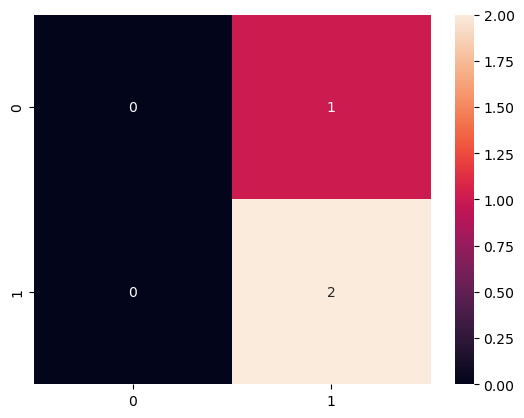

In [89]:
sns.heatmap(cm,annot=True)

Create visualizations to represent the results of the Decision Tree model on the test 
set. Create visualizations to represent the results of the Decision Tree model on the 
test set. 

In [90]:
from sklearn import tree

In [91]:
text_representation = tree.export_text(decision_tree_model)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- feature_1 <= 1.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.00
|   |   |   |   |--- class: 0



[Text(0.3333333333333333, 0.9, 'Outlook <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.2222222222222222, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4444444444444444, 0.7, 'Wind <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2222222222222222, 0.5, 'Outlook <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.3, 'Humidity <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.5, 'Outlook <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5555555555555556, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.3, 'Temperature <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.1, 'entro

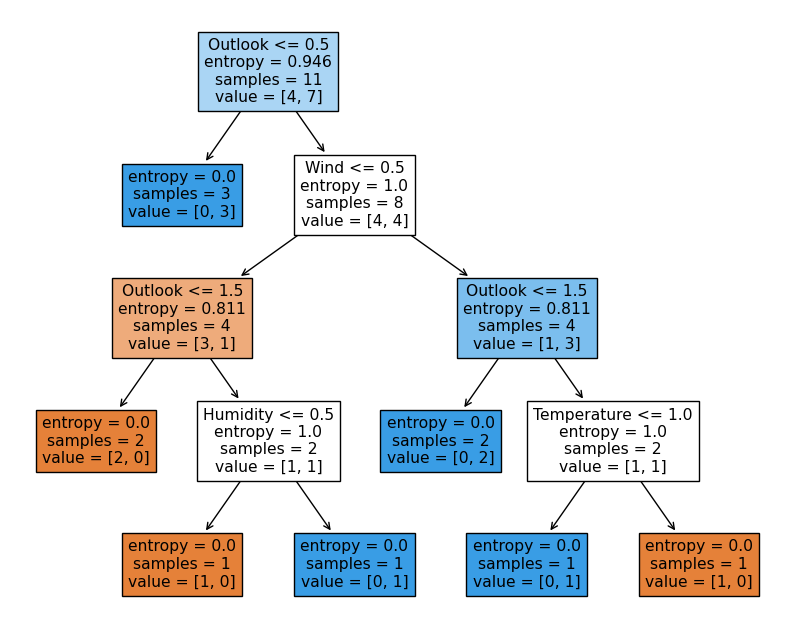

In [95]:
plt.figure(figsize=(10,8))
tree.plot_tree(decision_tree_model,filled=True,feature_names=df.columns)